# Projeto de Classificação de Texto - IMDB (Pt-Br)

**LinkedIn**: https://linkedin.com/in/matheusjerico <br>
**Github**: https://github.com/matheusjerico

#### O que será feito?

- Ler o conjunto de dados que o Luís Fred forneceu na Plataforma do Kaggle (https://www.kaggle.com/luisfredgs/imdb-ptbr/)
- Transformar os textos das avaliação em valores numéricos usando Pipeline do Scikit-learn
- Criar um Classificador, treinar e realizar predições
- Testar o Classificador com novas avaliações
- Avaliar o desempenho do Classificador

#### Qual o objetivo?
Realizar a Análise de Sentimento do conjunto de Dados de Avaliações de filmes do IMDB, em português. Construir um Classificador com o objetivo de classificar se a avaliação foi **Positiva** ou **Negativa**.

## 1. Importar bibliotecas

In [1]:
import numpy as np
import pandas as pd
import re
import unicodedata
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Markdown, display
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk import stem

## 2. Carregar conjunto de dados

- unzip arquivo

In [2]:
! unzip -n ../dataset/imdb-ptbr.zip  -d ../dataset
! ls ../dataset/

Archive:  ../dataset/imdb-ptbr.zip
imdb-ptbr.zip  imdb-reviews-pt-br.csv


- carregando conjutno de dados

In [3]:
dataset = pd.read_csv("../dataset/imdb-reviews-pt-br.csv")

In [4]:
dataset.drop(columns=['text_en', 'id'], inplace=True)

- primeiros registros do dataset

In [5]:
dataset.head()

,text_pt,sentiment
0,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,Este é um exemplo do motivo pelo qual a maiori...,neg
2,"Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,Filmes de fotos de latão não é uma palavra apr...,neg


- últimos registros do dataset

In [6]:
dataset.tail()

,text_pt,sentiment
49454,"Como a média de votos era muito baixa, e o fat...",pos
49455,O enredo teve algumas reviravoltas infelizes e...,pos
49456,Estou espantado com a forma como este filme e ...,pos
49457,A Christmas Together realmente veio antes do m...,pos
49458,O drama romântico da classe trabalhadora do di...,pos


- dimensão do dataset

In [7]:
dataset.shape

(49459, 2)

- Vamos visualizar um registro negativo:

In [8]:
display(Markdown('> '+dataset['text_pt'][2]))

> Primeiro de tudo eu odeio esses raps imbecis, que não poderiam agir se tivessem uma arma pressionada contra suas testas. Tudo o que eles fazem é amaldiçoar e atirar um no outro e agir como uma versão clichê de gangsters. O filme não leva mais de cinco minutos para explicar o que está acontecendo antes que já estivessem no armazém. Não há um único personagem simpático nesse filme, com exceção do sem-teto, que também é o único com metade do cérebro. William Paxton e William Sadler são ambos "hill billies" e Sadler é tão vilão quanto os gângsteres. Eu não gostava dele desde o começo. O filme está cheio de violência sem sentido e especialidade de Walter Hills: pessoas caindo de janelas com vidros voando por toda parte. Não há praticamente nenhum enredo e é um grande problema quando você torce por ninguém. Todo mundo morre, exceto Paxton e o sem-teto e todos recebem o que merecem. Os dois únicos negros que podem atuar são o sem-teto e o viciado, mas são atores de profissão, não irritantes rappers feios. Fique longe dessa porcaria. e observe 48 horas 1 e 2 em vez disso. No mínimo, eles têm personagens de que você gosta, senso de humor e nada além de atores reais no elenco.

## 2. Análise Exploratória

### 2.1. Valores NaN

In [9]:
dataset.isnull().sum()

text_pt      0
sentiment    0
dtype: int64

### 2.2. Avaliações vazias?

In [10]:
blk = []

for index, text, label in dataset.itertuples():
    if type(text) == str:
        if text.isspace():
            blk.append(i)

print(f"{len(blk)}, vazios: {blk}")

0, vazios: []


### 2.3. Distribuição das avaliações

In [11]:
dataset['sentiment'].value_counts()

neg    24765
pos    24694
Name: sentiment, dtype: int64

- Dataset é balanceado.

## 3. Processamento dos Dados

In [ ]:
BAD_SYMBOLS_RE = re.compile(r'[^0-9a-z]')
STOPWORDS = set(stopwords.words('portuguese'))
stemmer = stem.RSLPStemmer()

In [ ]:
def strip_accents(text):
    try:
        text = unicode(text, 'utf-8')
    except (TypeError, NameError):  # unicode is a default on python 3
        pass
    text = unicodedata.normalize('NFD', text)
    text = text.encode('ascii', 'ignore')
    text = text.decode("utf-8")

    return str(text)

def preprocess_stemming_text(text):
    text = text.lower()

    text = strip_accents(text)
    text = BAD_SYMBOLS_RE.sub(' ', text)
    text = ' '.join(stemmer.stem(word)
                    for word in text.split() if word not in STOPWORDS)

    return text 

In [ ]:
dataset['text_pt_stemm'] = dataset['text_pt'].apply(preprocess_stemming_text)
dataset.head()

## 4. Divisão dos Dados

- Colocando as avaliações em lower case

In [12]:
dataset['text_pt'] = dataset['text_pt'].str.lower()

- dividindo os dados em treino e teste

In [13]:
X = dataset['text_pt']
y = dataset['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 17)

## 5. Construindo Pipeline 
- 1º etapa: TD-IDF
- 2º etapa: Machine learning

### 5.1. Naive Bayes

In [14]:
clf_nb = Pipeline([('TF-IDF', TfidfVectorizer(lowercase=True, stop_words=stopwords.words('portuguese'))),
                   ('Classificador', MultinomialNB()),
])

### 5.2. Linear SVC

In [15]:
clf_svc = Pipeline([('TF-IDF', TfidfVectorizer(lowercase=True, stop_words=stopwords.words('portuguese'))),
                   ('Classificador', LinearSVC()),
])

### 4.3. Random Forest

In [16]:
clf_rf = Pipeline([('TF-IDF', TfidfVectorizer(lowercase=True, stop_words=stopwords.words('portuguese'))),
                   ('Classificador', RandomForestClassifier()),
])

## 5. Treinamento, Predição e Avaliação - ML

### 5.1. Naive Bayes

- Treinamento

In [17]:
clf_nb.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('TF-IDF',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=['de', 'a', 'o', 'que', 'e', 'é',
                                             'do', 'da', 'em', 'um', 'para',
                                             'com', 'não', 'uma', 'os', 'no',
                                             'se', 'na', 'por', 'mais', 'as',
                                             'dos', 'como', 'mas', 'ao', 'ele',
                                             'das', 'à', 'seu', 'sua', ...],
        

- Predição

In [18]:
preds = clf_nb.predict(X_test)

- Matriz de Confusão

Text(0.5, 24.0, 'Classe Predita')

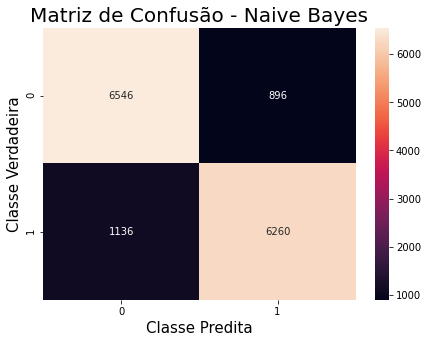

In [19]:
fig, ax = plt.subplots(figsize=(7, 5))
sns.heatmap(confusion_matrix(y_test, preds), annot=True, fmt="d");
ax.set_title("Matriz de Confusão - Naive Bayes", fontsize=20)
ax.set_ylabel('Classe Verdadeira', fontsize=15)
ax.set_xlabel('Classe Predita', fontsize=15)

- Precisão, Revocação e F1-Score

In [20]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

         neg       0.85      0.88      0.87      7442
         pos       0.87      0.85      0.86      7396

    accuracy                           0.86     14838
   macro avg       0.86      0.86      0.86     14838
weighted avg       0.86      0.86      0.86     14838



- Acurácia

In [21]:
print(accuracy_score(y_test,preds))

0.8630543199892169


### 5.2. Linear SVC

- treinamento

In [22]:
clf_svc.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('TF-IDF',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=['de', 'a', 'o', 'que', 'e', 'é',
                                             'do', 'da', 'em', 'um', 'para',
                                             'c...
                                             'das', 'à', 'seu', 'sua', ...],
                                 strip_accents=None, sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use

- predição

In [23]:
preds = clf_svc.predict(X_test)

- matriz de confusão

Text(0.5, 24.0, 'Classe Predita')

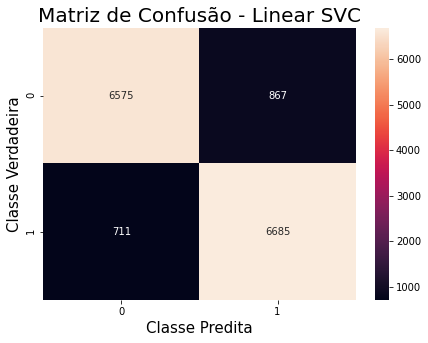

In [24]:
fig, ax = plt.subplots(figsize=(7, 5))
sns.heatmap(confusion_matrix(y_test, preds), annot=True, fmt="d");
ax.set_title("Matriz de Confusão - Linear SVC", fontsize=20)
ax.set_ylabel('Classe Verdadeira', fontsize=15)
ax.set_xlabel('Classe Predita', fontsize=15)

- Precisão, Revocação e F1-Score

In [25]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

         neg       0.90      0.88      0.89      7442
         pos       0.89      0.90      0.89      7396

    accuracy                           0.89     14838
   macro avg       0.89      0.89      0.89     14838
weighted avg       0.89      0.89      0.89     14838



- acurácia

In [26]:
print(accuracy_score(y_test,preds))

0.8936514355034372


### 5.3. Random Forest

- treinamento

In [27]:
clf_rf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('TF-IDF',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=['de', 'a', 'o', 'que', 'e', 'é',
                                             'do', 'da', 'em', 'um', 'para',
                                             'c...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_l

- predição

In [28]:
preds = clf_rf.predict(X_test)

- matriz de confusão

Text(0.5, 24.0, 'Classe Predita')

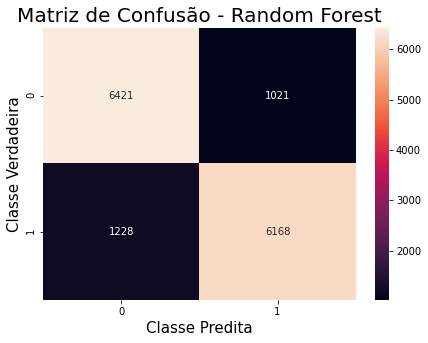

In [29]:
fig, ax = plt.subplots(figsize=(7, 5))
sns.heatmap(confusion_matrix(y_test, preds), annot=True, fmt="d");
ax.set_title("Matriz de Confusão - Random Forest", fontsize=20)
ax.set_ylabel('Classe Verdadeira', fontsize=15)
ax.set_xlabel('Classe Predita', fontsize=15)

- acurácia

In [30]:
print(accuracy_score(y_test,preds))

0.8484297075077504


## 6. Análise

O algorítmo que obteve o melhor desempenho foi o Linear SVC.
- Acurácia: 89%
- Revocação: 90%
- F1-Score: 89%

## 7. Predição de nova avaliação

In [31]:
avaliacao_supernatural = "A série Supernatural é longa, mas é muito boa e emocionante. \
Você se apega aos personagens, sofre por eles.. É uma série cheia de altos e baixos."

In [32]:
avaliacao_purge = "A série é chata, o enredo é péssimo, horrível, Não gostei da śerie"

In [33]:
print(clf_svc.predict([avaliacao_supernatural]))

['pos']


In [34]:
print(clf_svc.predict([avaliacao_purge]))

['neg']


## FIM